*ref: https://inria.github.io/scikit-learn-mooc/python_scripts/cross_validation_baseline.html* 

In [1]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$

In [3]:
# Across all evaluations, we will use a ShuffleSplit cross-validation splitter with 
# 20% of the data held on the validation side of the split.

from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)

In [4]:
# We start by running the cross-validation for a simple decision tree regressor which is our model of interest. 
# Besides, we will store the testing error in a pandas series to make it easier to plot the results.

import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

regressor = DecisionTreeRegressor()
cv_results_tree_regressor = cross_validate(
    regressor, data, target, cv=cv, scoring="neg_mean_absolute_error", n_jobs=2
)

errors_tree_regressor = pd.Series(
    -cv_results_tree_regressor["test_score"], name="Decision tree regressor"
)
errors_tree_regressor.describe()

count    30.000000
mean     45.757852
std       1.196442
min      42.968160
25%      45.049615
50%      45.718295
75%      46.699596
max      48.045200
Name: Decision tree regressor, dtype: float64

In [5]:
# Then, we evaluate our baseline. This baseline is called a dummy regressor.
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy="mean")
result_dummy = cross_validate(
    dummy, data, target, cv=cv, scoring="neg_mean_absolute_error", n_jobs=2
)
errors_dummy_regressor = pd.Series(
    -result_dummy["test_score"], name="Dummy regressor"
)
errors_dummy_regressor.describe()


count    30.000000
mean     91.140009
std       0.821140
min      89.757566
25%      90.543652
50%      91.034555
75%      91.979007
max      92.477244
Name: Dummy regressor, dtype: float64

In [6]:
# We now plot the cross-validation testing errors for the mean target baseline and the actual decision tree regressor.

all_errors = pd.concat(
    [errors_tree_regressor, errors_dummy_regressor],
    axis=1,
)
all_errors

,Decision tree regressor,Dummy regressor
0,46.585312,90.713153
1,46.999392,90.539353
2,44.754475,91.941912
3,43.810192,90.213912
4,48.045200,92.015862
5,44.931413,90.542490
6,43.586013,89.757566
7,45.249508,92.477244
8,45.390567,90.947952
9,44.982984,91.991373


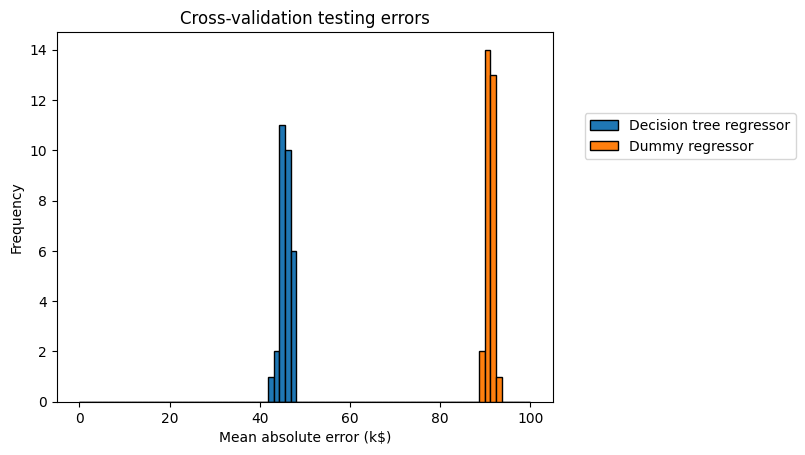

In [7]:
import matplotlib.pyplot as plt
import numpy as np

bins = np.linspace(start=0, stop=100, num=80)
all_errors.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Cross-validation testing errors")